Welcome to our CSE 422 Final Lab Project,

In [2]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

Firstly we imported the necessary libraries such as pandas sklearn for our algorithm

In [1]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19_Death_Counts_by_Sex__Age__and_State.csv to COVID-19_Death_Counts_by_Sex__Age__and_State.csv


Here we have uploaded our dataset's csv file

In [3]:
df = pd.read_csv('COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
df.head(2)

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/23/2020,02/01/2020,09/19/2020,United States,All Sexes,All Ages,188470.0,2022937.0,192312.0,84930.0,6699.0,301553.0,NaN
1,09/23/2020,02/01/2020,09/19/2020,United States,All Sexes,Under 1 year,20.0,11313.0,105.0,3.0,16.0,138.0,NaN


Here we assigned our uploaded dataset into a Table named df & we checked the first 3 Data entries of our table

In [4]:
df.shape

(2661, 13)

To check the the total number of columns & rows we used the .shape method

In [ ]:
df.columns

Here we checked the names of each of the features

In [ ]:
df['Pneumonia Deaths'].value_counts()

Bakhtriar's Part (Data Visualization) 


range(0, 2661)


<Figure size 432x288 with 0 Axes>

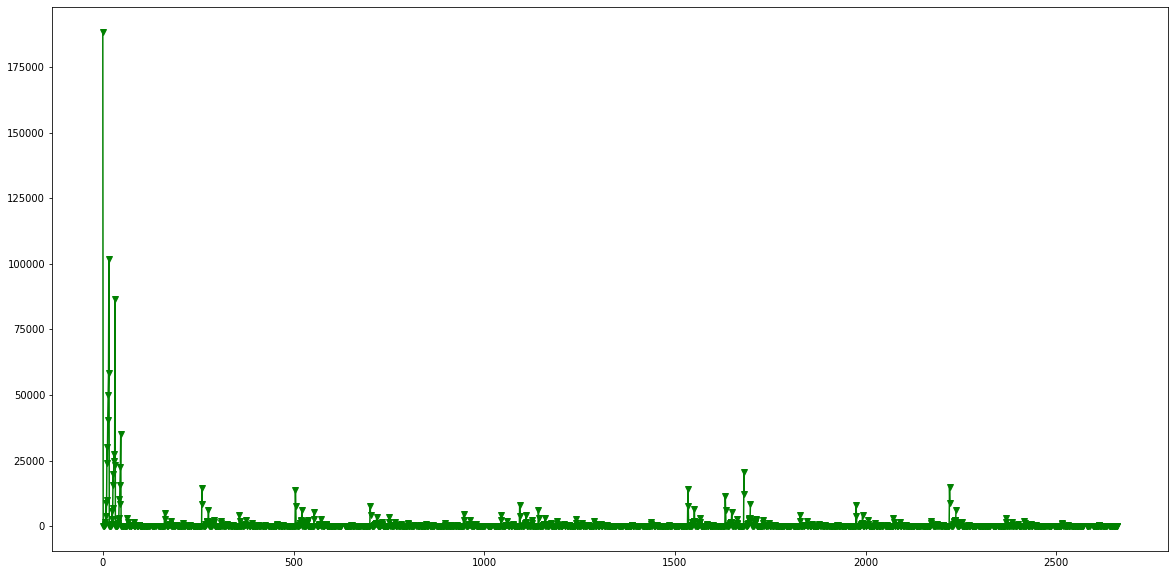

In [5]:
x_data= range(0, df.shape[0])
print(x_data)#0-2661
fig=plt.figure() #object
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_data, df['COVID-19 Deaths'], marker='v', color='g')

<class 'list'>


Text(0.5, 1.0, 'Covid dataset')

<Figure size 432x288 with 0 Axes>

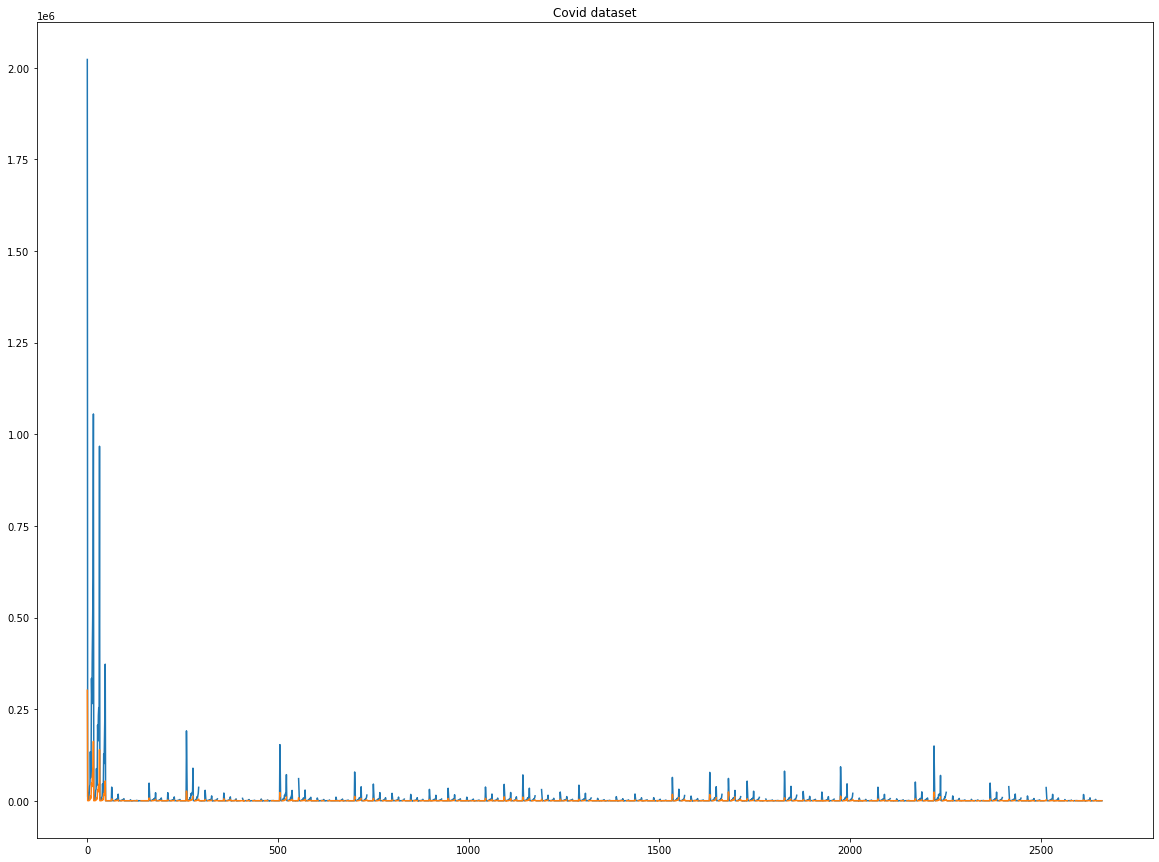

In [6]:
columns = ['Total Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths']
print(type(columns))

x_data= range(0, df.shape[0]) #row shape


fig=plt.figure()
fig, ax = plt.subplots(figsize=(20,15))

for c in columns:
  ax.plot(x_data, df[c])
ax.set_title('Covid dataset')

Text(0, 0.5, 'COVID-19 Deaths')

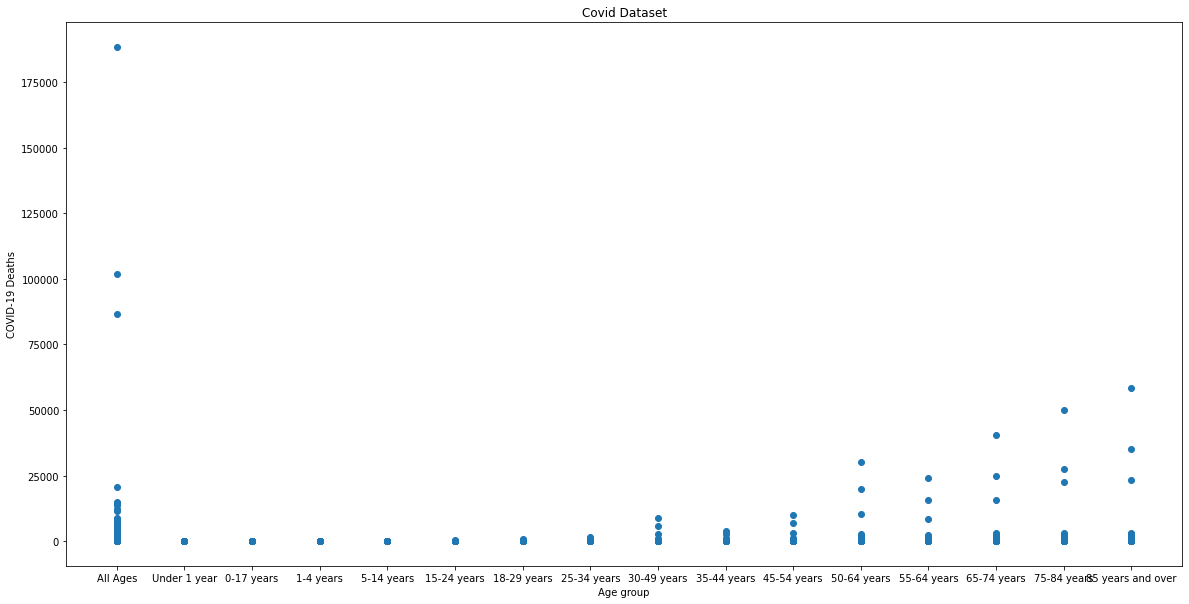

In [7]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['Age group'], df['COVID-19 Deaths']) #showing scatter Age group against COVID-19 Deaths

# set a title and labels
ax.set_title('Covid Dataset')
ax.set_xlabel('Age group')
ax.set_ylabel('COVID-19 Deaths')

                                          COVID-19 Deaths  ...  Pneumonia, Influenza, or COVID-19 Deaths
COVID-19 Deaths                                  1.000000  ...                                  0.999184
Total Deaths                                     0.993960  ...                                  0.996965
Pneumonia Deaths                                 0.997444  ...                                  0.999337
Pneumonia and COVID-19 Deaths                    0.998276  ...                                  0.998107
Influenza Deaths                                 0.985080  ...                                  0.985423
Pneumonia, Influenza, or COVID-19 Deaths         0.999184  ...                                  1.000000

[6 rows x 6 columns]


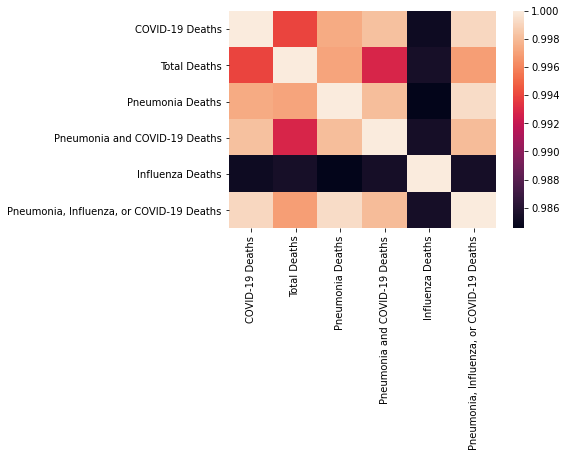

In [8]:
import seaborn as sns
co = df.corr() 
print(co)
sns.heatmap(co)

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb27e907cf8>)

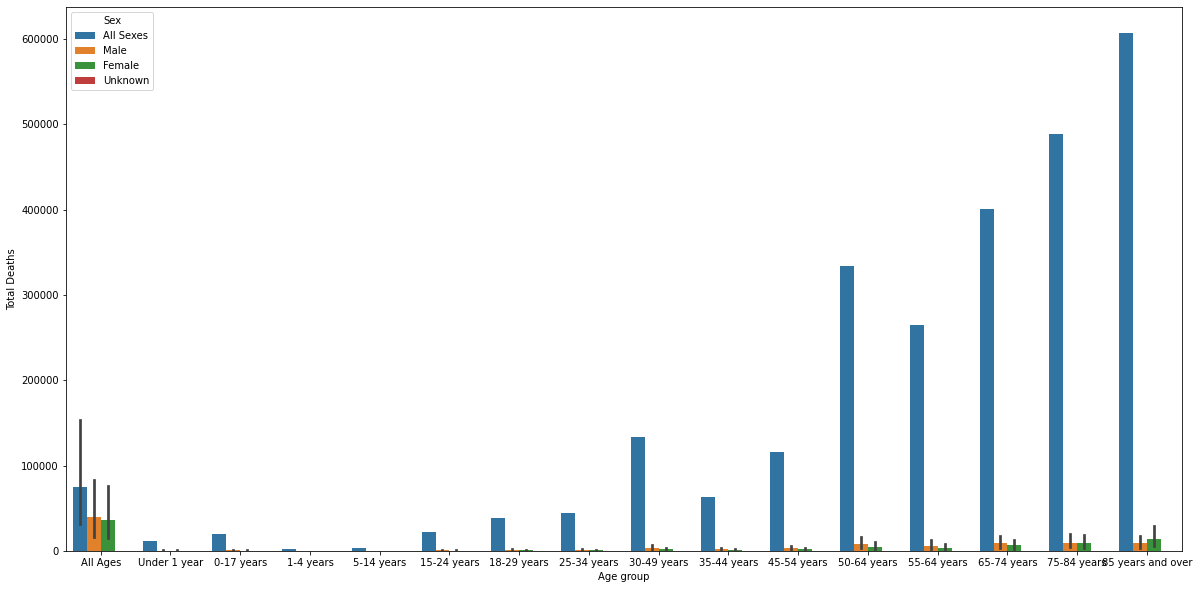

In [9]:
fig=plt.figure(figsize=(20,10))
fig, sns.barplot(data=df, x="Age group", y="Total Deaths", hue= "Sex")

(<Figure size 1440x720 with 0 Axes>,
 <seaborn.axisgrid.PairGrid at 0x7fb27e13e4a8>)

<Figure size 1440x720 with 0 Axes>

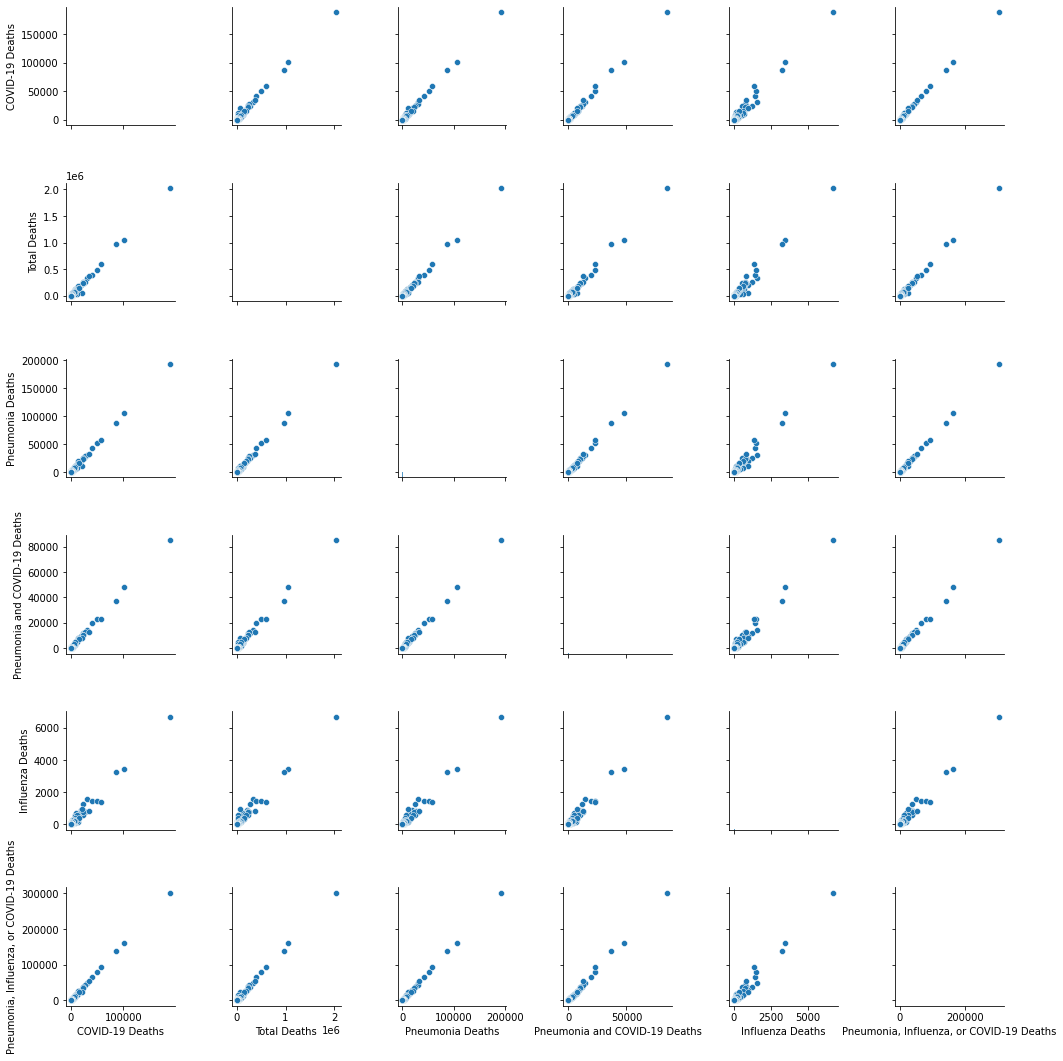

In [10]:
fig=plt.figure(figsize=(20,10))

fig, sns.pairplot(df)

# Ibrahim Khan- 18201152 - Feature selection(Pre processing)


To preprocess our dataset , we have to check for missing data entries or entries which are NOt relevant to achieving our Goal. So we have to Select Features which are related to our goal & impute null data entries. 

After Following the 'Feature selection tutorial' We checked for all the relevant features & found out that the 'Data as of' & 'FootNote' features are not related to our algorithm's output.

Here we are keeping data which are relevent and necessary for our desired outcome. so we will remove data which are useless to us and here 'date of as' and 'footnote' will be dropped. as date as of and footnote won't help us to get the desired result.

In [ ]:
df = df.drop(['Data as of', 'Footnote'], axis = 1)

In [ ]:
df.head()

We can check for null data entries in our dataset using the isnull() function

In [ ]:
df.isnull()

,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1411,False,False,False,False,False,False,False,False,False,False,False
1412,False,False,False,False,False,False,False,False,False,False,False
1413,False,False,False,False,False,False,False,False,True,True,False
1414,False,False,False,False,False,False,True,False,False,False,False


# Asef hassan Amiz- 16321088 - Imputing missing values (pre processing)

This displays a Truthtable where if any cell contains any null/missing entry then it returns True for that cell, else false,

However since it is a Huge dataset it will take a long time to see each and every table rows serially to scan for nulls,
Hence to detect null values more efficiently we will use the function -

.isnull().sum() which will show us the total number of null entries present under a single Column

In [ ]:
df.isnull().sum()

Data as of                                    0
Start week                                    0
End Week                                      0
State                                         0
Sex                                           0
Age group                                     0
COVID-19 Deaths                             278
Total Deaths                                113
Pneumonia Deaths                            332
Pneumonia and COVID-19 Deaths               278
Influenza Deaths                            540
Pneumonia, Influenza, or COVID-19 Deaths    354
Footnote                                    536
dtype: int64

We can see that the Remaining columns after Feature selection still have many missing data entries under them,

So to solve this issue what we can do is drop the rows which include any null value in it.

In [ ]:
df = df[df['COVID-19 Deaths'].notnull()]
print("Shape  after removing null values: ", df.shape)

Shape  after removing null values:  (1138, 11)


In [ ]:
df = df[df['Total Deaths'].notnull()]
print("Shape  after removing null values: ", df.shape)

Shape  after removing null values:  (1033, 11)


In [ ]:
df = df[df['Pneumonia Deaths'].notnull()]
print("Shape  after removing null values: ", df.shape)

Shape  after removing null values:  (892, 11)


In [ ]:
df = df[df['Pneumonia and COVID-19 Deaths'].notnull()]
print("Shape  after removing null values: ", df.shape)

Shape  after removing null values:  (791, 11)


In [ ]:
df = df[df['Influenza Deaths'].notnull()]
print("Shape  after removing null values: ", df.shape)

Shape  after removing null values:  (536, 11)


In [ ]:
df = df[df['Pneumonia, Influenza, or COVID-19 Deaths'].notnull()]
print("Shape  after removing null values: ", df.shape)

Shape  after removing null values:  (536, 11)


In [ ]:
df.isnull().sum()

Start week                                  0
End Week                                    0
State                                       0
Sex                                         0
Age group                                   0
COVID-19 Deaths                             0
Total Deaths                                0
Pneumonia Deaths                            0
Pneumonia and COVID-19 Deaths               0
Influenza Deaths                            0
Pneumonia, Influenza, or COVID-19 Deaths    0
dtype: int64

So now our dataset has no missing values in it anymore , and all the featueres rema

# Ibrahim Khan ID - Encoding Categorical Features (pre-processing)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COVID-19 Deaths                1138 non-null   float64
 1   Total Deaths                   1303 non-null   float64
 2   Pneumonia Deaths               1084 non-null   float64
 3   Pneumonia and COVID-19 Deaths  1138 non-null   float64
dtypes: float64(4)
memory usage: 44.4 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder 
#importing lavelencoder from sklearn
enc = LabelEncoder()

In [ ]:
df['Sex_enc'] = enc.fit_transform(df['Sex'])
#Encoding the sex column into a numeric values
Sex_enc = pd.get_dummies(df['Sex'])
print(df['Sex'].unique())
print(df['Sex_enc'].unique())

we have encoded a column by Labelencoder() method and stored the encoded values in a different column sex_enc . and then state column into state_enc and same goes for age group
Here, I have divided unique categories into dummy column and stored one_hot values in each coresponding column with just 1. 

In [ ]:
df['State_enc'] = enc.fit_transform(df['State'])
#transforming state column into state_enc column with encoded values
State_enc = pd.get_dummies(df['State'])
print(df['State'].unique())
print(df['State_enc'].unique())

In [ ]:
df['Age group_enc'] = enc.fit_transform(df['Age group'])
#transforming state column into encoded
Age_group_enc = pd.get_dummies(df['Age group'])
print(df['Age group'].unique())
print(df['Age group_enc'].unique())

here, i am doing the same encoding and dummies for State and Age group columns.

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COVID-19 Deaths                1138 non-null   float64
 1   Total Deaths                   1303 non-null   float64
 2   Pneumonia Deaths               1084 non-null   float64
 3   Pneumonia and COVID-19 Deaths  1138 non-null   float64
dtypes: float64(4)
memory usage: 44.4 KB


,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths
0,16.0,9159.0,83.0,2.0
1,10.0,1751.0,56.0,2.0
2,23.0,2714.0,88.0,7.0
3,242.0,17079.0,340.0,81.0
4,1133.0,35456.0,1297.0,499.0


lastly i checked the info of the data in the dataset and printed first 5 rows to see the updated data.

MD. Omar Hasan Akash ID - 16301178- Machine Learning 
---



In [ ]:
df = pd.read_csv('COVID-19_Death_Counts_by_Sex__Age__and_State.csv', usecols=["COVID-19 Deaths", "Total Deaths", "Pneumonia Deaths", "Pneumonia and COVID-19 Deaths"])
df.head(2)

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths
0,16.0,9159.0,83.0,2.0
1,10.0,1751.0,56.0,2.0


read the csv again and see the values. as a group project, everyone do their own part.

In [ ]:
df.shape

(1416, 4)

df.shape will give the entries information of the dataframe.

In [ ]:
df.isnull().sum()

COVID-19 Deaths                  278
Total Deaths                     113
Pneumonia Deaths                 332
Pneumonia and COVID-19 Deaths    278
dtype: int64

finding the null values for each columns

In [ ]:
print('NaN values: ', df.isnull().values.sum())

NaN values:  1001


we tried to find the number of nan values.. here it shows 1001

In [ ]:
print(df.iloc[40])

COVID-19 Deaths                   0.0
Total Deaths                     39.0
Pneumonia Deaths                  NaN
Pneumonia and COVID-19 Deaths     0.0
Name: 40, dtype: float64


df.iloc is used to access data in specific row or columns, using iloc we can access values in specific row column entries

In [ ]:
# Mean imputation
imputated_df = df.fillna(value=df.mean())
imputated_df.isnull().sum()

COVID-19 Deaths                  0
Total Deaths                     0
Pneumonia Deaths                 0
Pneumonia and COVID-19 Deaths    0
dtype: int64

In [ ]:
print(imputated_df.isnull().values.sum())

0


In [ ]:
imputated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COVID-19 Deaths                1416 non-null   float64
 1   Total Deaths                   1416 non-null   float64
 2   Pneumonia Deaths               1416 non-null   float64
 3   Pneumonia and COVID-19 Deaths  1416 non-null   float64
dtypes: float64(4)
memory usage: 44.4 KB


In [ ]:
imputated_df.describe()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths
count,1416.000000,1.416000e+03,1416.00000,1416.000000
mean,1048.084359,1.014810e+04,1151.51107,457.793497
std,6751.034939,7.394421e+04,7028.20586,2950.030271
min,0.000000,0.000000e+00,0.00000,0.000000
25%,0.000000,9.900000e+01,19.00000,0.000000
50%,84.000000,7.585000e+02,205.00000,36.000000
75%,1048.084359,4.943000e+03,1151.51107,457.793497
max,149192.000000,1.652382e+06,156111.00000,65235.000000


In [ ]:
print(imputated_df['COVID-19 Deaths'])

0         16.0
1         10.0
2         23.0
3        242.0
4       1133.0
         ...  
1411       0.0
1412       0.0
1413      11.0
1414       0.0
1415      34.0
Name: COVID-19 Deaths, Length: 1416, dtype: float64


In [ ]:
imputated_df.iloc[40]

COVID-19 Deaths                     0.00000
Total Deaths                       39.00000
Pneumonia Deaths                 1151.51107
Pneumonia and COVID-19 Deaths       0.00000
Name: 40, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [ ]:
X = np.array(imputated_df['COVID-19 Deaths']).reshape(-1, 1)
y = np.array(imputated_df['Total Deaths']).reshape(-1, 1)

I randomly picked up two columns which is Covid-19 deaths, and total deaths to apply linear regression, I can also take other columns but taking these two columns seem reasonable to me.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

generating train and test sets, the test size 0.25 is chosen as an ideal, but it can also perform well on 1/3 or .33 values

In [ ]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.9848437197241708


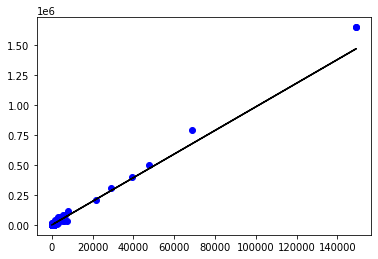

In [ ]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 

The plotting hardly try to differentiate the two values, but for this kind of dataset it works well.

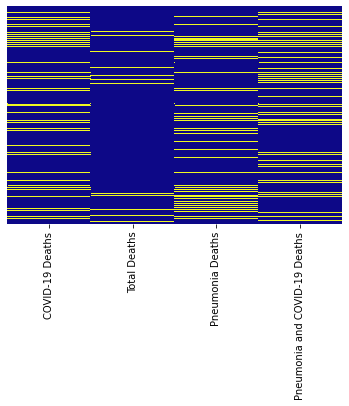

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

This is visualization how the large number of null values exist in our dataset. As a beginner it was challenging for us to identify the issue first, but we tried our best to apply our hands on skill to apply everything we have learned so far.

sns heatmap basically, map the nan values in every columns, the colors you see is the nan values.